# Krystian Gronek & Katarzyna Piotrowska
# Text Mining and Social Media Mining, final project - Analyzing men and women comments using NLP methods

# Loading packages and data

In [1]:
%matplotlib inline 
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import seaborn as sns
from collections import Counter

In [2]:
# Functions

# Function to convert list of strings represented itself as string to a normal list with strings
def destring_list(input_list):
    input_list = input_list.strip('][')
    output_list = re.compile("\]\[").sub(', ', input_list)
    output_list = re.compile("\'").sub('', output_list).split(', ') 
    return output_list


In [3]:
men = pd.read_csv('data/final_askmen.csv', sep = ';')
women = pd.read_csv('data/final_askwomen.csv', sep = ';')

In [4]:
men.info()
print("\n")
women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16001 entries, 0 to 16000
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   username                          16001 non-null  object 
 1   com_original                      16001 non-null  object 
 2   cleaned                           16001 non-null  object 
 3   cleaned_wo_sw                     16001 non-null  object 
 4   tokenized                         16001 non-null  object 
 5   stemmed                           16001 non-null  object 
 6   tokenized_wo_sw                   16001 non-null  object 
 7   submission_title                  16001 non-null  object 
 8   submission_title_cleaned          16001 non-null  object 
 9   submission_title_cleaned_wo_sw    16001 non-null  object 
 10  submission_title_tokenized        16001 non-null  object 
 11  submission_title_stemmed          16001 non-null  object 
 12  subm


# Distribution of 'submission_ups' variable

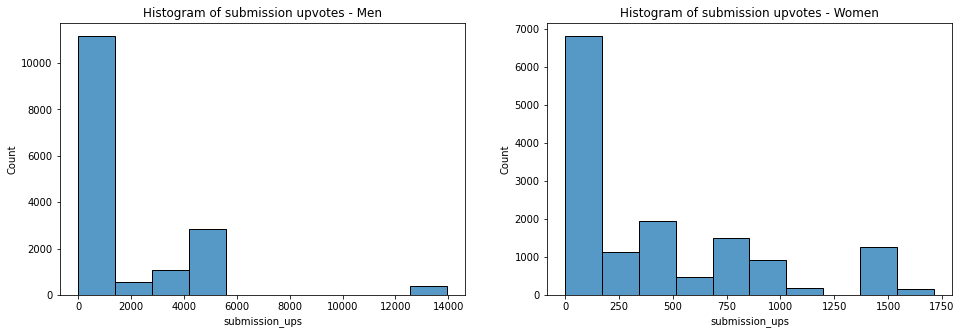

In [5]:
fig, ax =plt.subplots(1,2, figsize = (16,5))
hist_submissions_men = sns.histplot(data = men['submission_ups'], bins = 10, ax = ax[0]).set(title = "Histogram of submission upvotes - Men");
hist_submissions_women = sns.histplot(data = women['submission_ups'], bins = 10, ax = ax[1]).set(title = "Histogram of submission upvotes - Women");
plt.show();

# MINMAX scaling of variable 'comment_score' - distribution

Let's look back on the 'comment_score', 'minmax' and 'minmax_grouped' distributions first for men dataset then for women datase.The rescaling obviously did not affect the distribution of the values of comment score for men, just the range that it spans as we can see from 'minmax' density plot and histogram. The grouping however allowed to slightly scatter the distribution of the values.

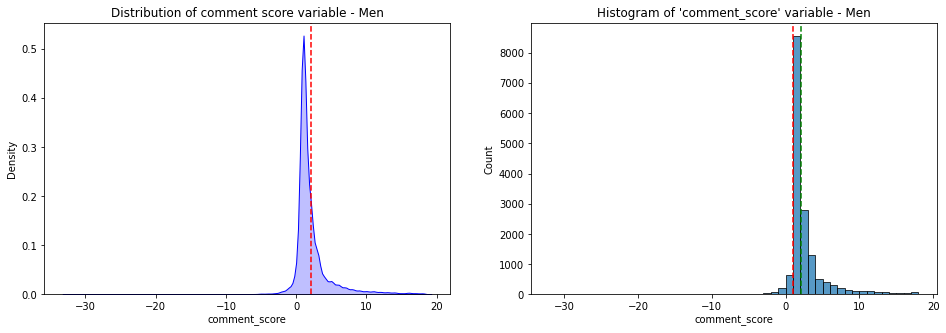

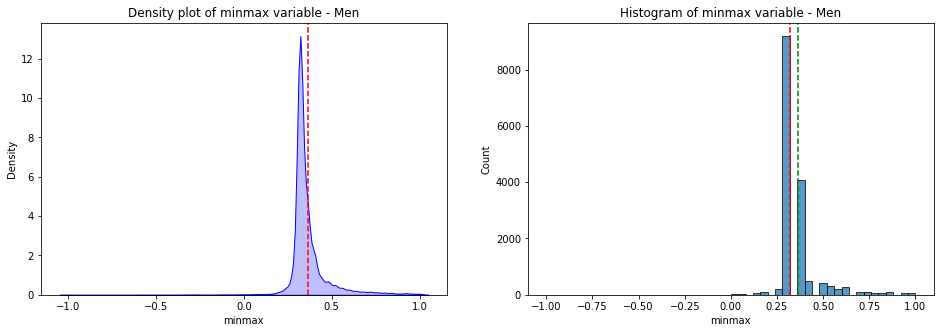

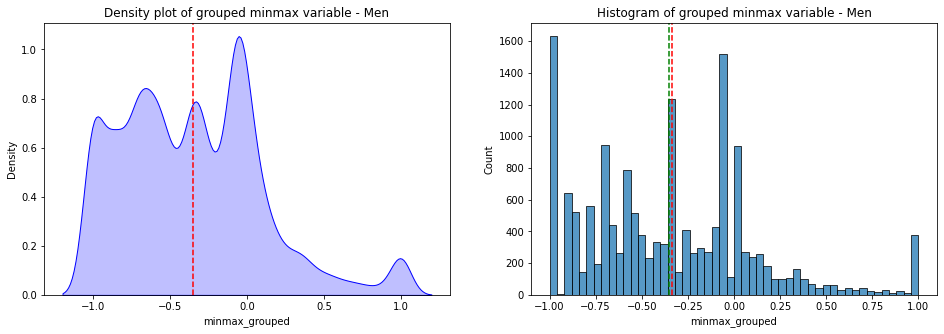

In [6]:
fig, ax =plt.subplots(1,2, figsize = (16,5))
original = sns.kdeplot(data = men.comment_score, fill = True, color = "b", ax = ax[0]);
original.axvline(men.comment_score.mean(), color='r', linestyle='--')
original.set_title("Distribution of comment score variable - Men")
hist_submissions_men = sns.histplot(data = men.comment_score, bins = 50, ax = ax[1]).set(title = "Histogram of 'comment_score' variable - Men");
plt.axvline(men.comment_score.median(), color='r', linestyle='--')
plt.axvline(men.comment_score.mean(), color='g', linestyle='--')
plt.show();

fig, ax =plt.subplots(1,2, figsize = (16,5))
minmax_men_plot = sns.kdeplot(data = men.minmax, fill = True, color = 'b', ax = ax[0]);
minmax_men_plot.set_title("Density plot of minmax variable - Men")
minmax_men_plot.axvline(men.minmax.mean(), color='r', linestyle='--')
hist_submissions_men = sns.histplot(data = men.minmax, bins = 50, ax = ax[1]).set(title = "Histogram of minmax variable - Men");
plt.axvline(men.minmax.median(), color='r', linestyle='--')
plt.axvline(men.minmax.mean(), color='g', linestyle='--')
plt.show();

fig, ax =plt.subplots(1,2, figsize = (16,5))
minmax_men_plot_grouped = sns.kdeplot(data = men.minmax_grouped, fill = True, color = 'b', ax = ax[0]);
minmax_men_plot_grouped.set_title("Density plot of grouped minmax variable - Men")
minmax_men_plot_grouped.axvline(men.minmax_grouped.mean(), color='r', linestyle='--')
hist_submissions_men = sns.histplot(data = men.minmax_grouped, bins = 50, ax = ax[1]).set(title = "Histogram of grouped minmax variable - Men");
plt.axvline(men.minmax_grouped.median(), color='r', linestyle='--')
plt.axvline(men.minmax_grouped.mean(), color='g', linestyle='--')
plt.show();


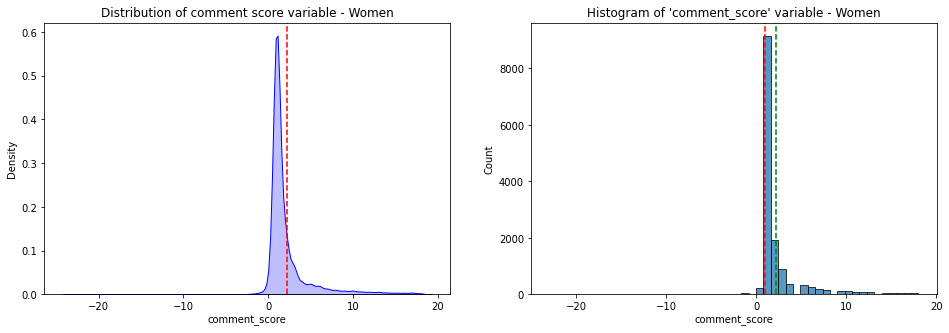

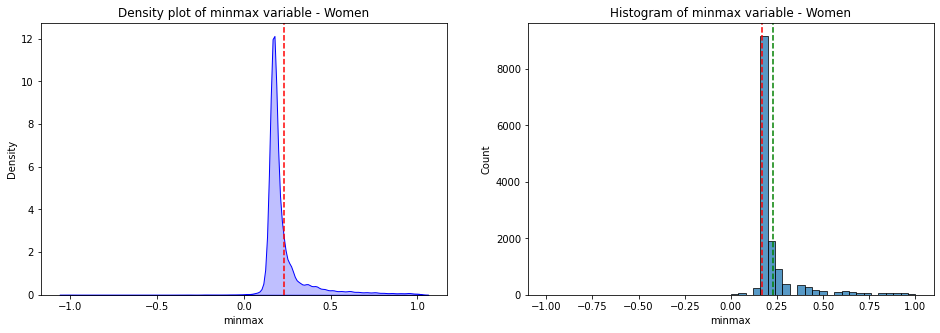

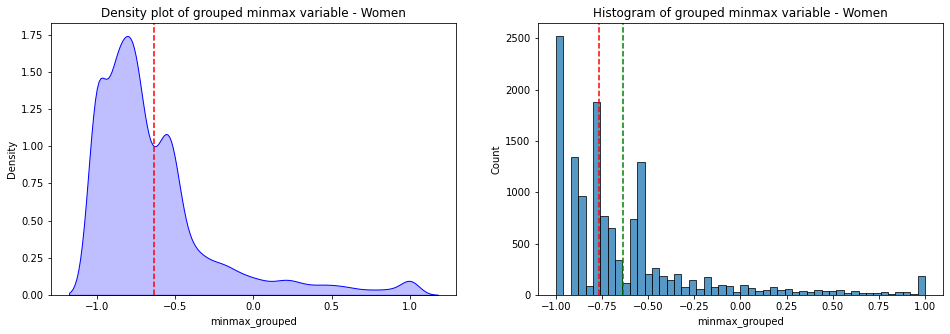

In [7]:
fig, ax =plt.subplots(1,2, figsize = (16,5))
original = sns.kdeplot(data = women.comment_score, fill = True, color = "b", ax = ax[0]);
original.axvline(women.comment_score.mean(), color='r', linestyle='--')
original.set_title("Distribution of comment score variable - Women")
hist_submissions_men = sns.histplot(data = women.comment_score, bins = 50, ax = ax[1]).set(title = "Histogram of 'comment_score' variable - Women");
plt.axvline(women.comment_score.median(), color='r', linestyle='--')
plt.axvline(women.comment_score.mean(), color='g', linestyle='--')
plt.show();

fig, ax =plt.subplots(1,2, figsize = (16,5))
minmax_women_plot = sns.kdeplot(data = women.minmax, fill = True, color = 'b', ax = ax[0]);
minmax_women_plot.set_title("Density plot of minmax variable - Women")
minmax_women_plot.axvline(women.minmax.mean(), color='r', linestyle='--')
hist_submissions_women = sns.histplot(data = women.minmax, bins = 50, ax = ax[1]).set(title = "Histogram of minmax variable - Women");
plt.axvline(women.minmax.median(), color='r', linestyle='--')
plt.axvline(women.minmax.mean(), color='g', linestyle='--')
plt.show();

fig, ax =plt.subplots(1,2, figsize = (16,5))
minmax_women_plot_grouped = sns.kdeplot(data = women.minmax_grouped, fill = True, color = 'b', ax = ax[0]);
minmax_women_plot_grouped.set_title("Density plot of grouped minmax variable - Women")
minmax_women_plot_grouped.axvline(women.minmax_grouped.mean(), color='r', linestyle='--')
hist_submissions_women = sns.histplot(data = women.minmax_grouped, bins = 50, ax = ax[1]).set(title = "Histogram of grouped minmax variable - Women");
plt.axvline(women.minmax_grouped.median(), color='r', linestyle='--')
plt.axvline(women.minmax_grouped.mean(), color='g', linestyle='--')
plt.show();


Looking at the variables distributions for women dataset we could say the same thing. The grouping allowed to slightly scatter the distribution of the values but in this case we can see that it is positively skewed. The question now is what variable to use for the final analysis. 

Because the values are still accumulated very close to each other and looking at the summary statistics below it seems the best way to classify positive and negative comments is to just create new categorical variable 'sentiment' that is a string 'negative' for negative comments that 'comment_score' values are smaller and equal to the median and 'positive' for 'comment_score' values that are bigger than the median. We will not use the mean score because for both dataset (men and women) it achives higher values than the median which would mean that most of the comments would have negative sentiment (which probably is not true). 

As we can see 'comment_score' is not the ideal variable to act as metric for analyzing the sentiment of the comments but it's the only variable avaiable to describe users opinions of other users comments. It may also seem like a black and white view of comments but it is just an approximation of the users sentiment.

In [8]:
men.describe()
women.describe()

,comment_score,submission_ups,minmax,minmax_grouped,is_positive
count,16001.000000,16001.000000,16001.000000,15959.000000,16001.000000
mean,2.092494,1586.597525,0.363700,-0.353816,0.396788
std,2.867938,2675.318921,0.114718,0.460709,0.489247
min,-32.000000,0.000000,-1.000000,-1.000000,0.000000
25%,1.000000,9.000000,0.320000,-0.700000,0.000000
50%,1.000000,251.000000,0.320000,-0.333333,0.000000
75%,2.000000,2893.000000,0.360000,-0.062500,1.000000
max,18.000000,13949.000000,1.000000,1.000000,1.000000


,comment_score,submission_ups,minmax,minmax_grouped,is_positive
count,14363.000000,14363.000000,14363.000000,13517.000000,14363.000000
mean,2.225231,428.524612,0.230499,-0.636484,0.338230
std,2.891945,473.230014,0.141070,0.400138,0.473124
min,-23.000000,0.000000,-1.000000,-1.000000,0.000000
25%,1.000000,58.000000,0.170732,-0.882353,0.000000
50%,1.000000,203.000000,0.170732,-0.764706,0.000000
75%,2.000000,780.000000,0.219512,-0.523810,1.000000
max,18.000000,1713.000000,1.000000,1.000000,1.000000


In [9]:
is_positive_men = list()
is_positive_women = list()


for i in men.comment_score:
    if (i > men.comment_score.median()):
        is_positive_men.append('positive')
    else:
        is_positive_men.append('negative')
        

for i in women.comment_score:
    if (i > women.comment_score.median()):
        is_positive_women.append('positive')
    else:
        is_positive_women.append('negative')
        
        
men['sentiment'] = is_positive_men
women['sentiment'] = is_positive_women

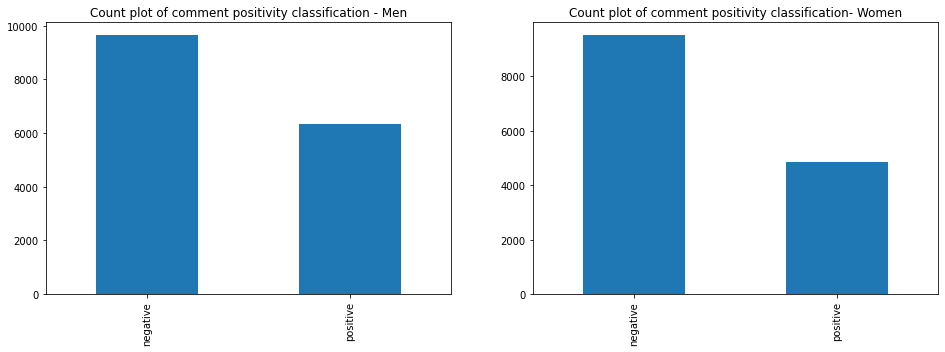

In [10]:
# Checking the counts of each category

fig, ax =plt.subplots(1,2, figsize = (16,5))
men['sentiment'].value_counts().plot(kind='bar', ax = ax[0]).set(title = "Count plot of comment positivity classification - Men");
women['sentiment'].value_counts().plot(kind='bar', ax = ax[1]).set(title = "Count plot of comment positivity classification- Women");
plt.show();

The division of the comments for positive and negative gave out slightly more negative comments but that's because the comment score is an integer number. Because of that dividing the dataset by median gives the most balanced ratio of 'positive' to 'negative' comments. This can be checked by changing the if statements in the foor loops above.

## Saving new variables to dataset

In [11]:
men.to_csv('./data/final_askmen.csv', sep = ';', encoding = "utf-8", index = None, header = True)
women.to_csv('./data/final_askwomen.csv', sep = ';', encoding = "utf-8", index = None, header = True)

# Wordcloud visualisations

/r/AskMen Wordcloud plot


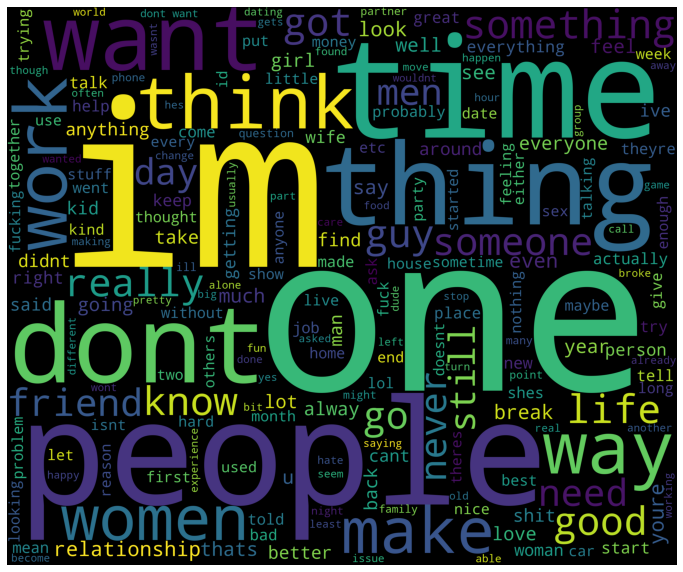

/r/AskWomen Wordcloud plot


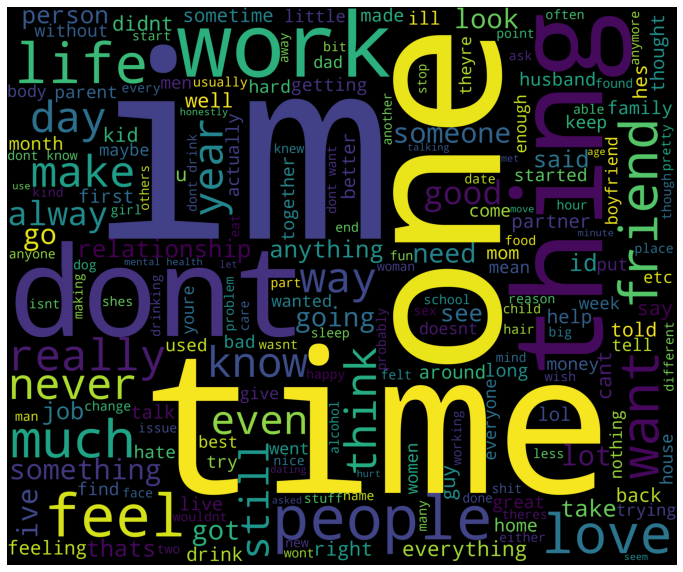

In [12]:
# shared stopword list
stopwords = set(STOPWORDS)

# Men word cloud - comments
cleaned_words_men = ' '.join(men['cleaned_wo_sw'])

wordcloud_men = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_words_men)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_men)
plt.axis('off')
print("/r/AskMen Wordcloud plot")
plt.show();

# Women word cloud - comments
cleaned_words_women = ' '.join(women['cleaned_wo_sw'])

wordcloud_women = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_words_women)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_women)
plt.axis('off')
print("/r/AskWomen Wordcloud plot")
plt.show();



As we can see the similarity of the most frequently used words by men and women is truly striking. The biggest diferrences here that we can see is that 'people' seem to be more common in men language than women while words like 'dont', 'feel'

We should delete the most used words for example 'time', 'im', 'dont', 'one', etc.

/r/AskMen Wordcloud plot


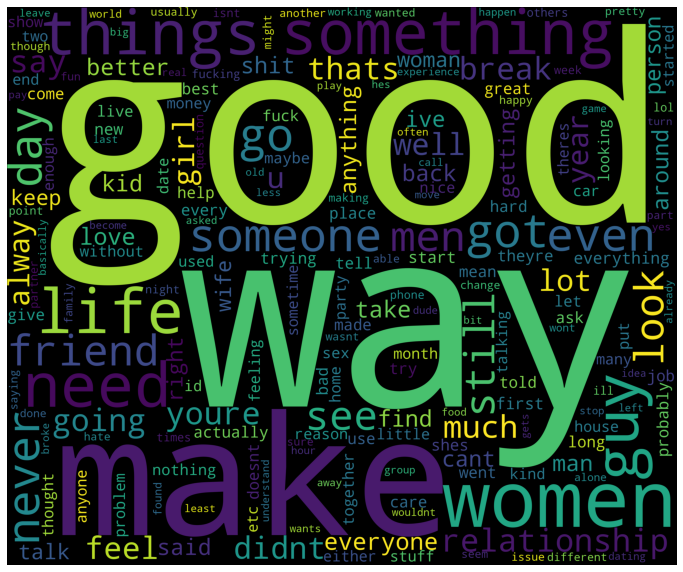

/r/AskWomen Wordcloud plot


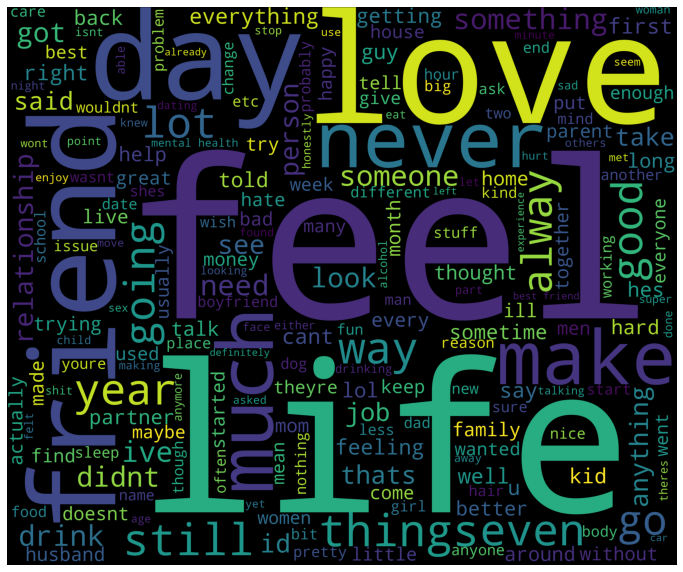

In [13]:
# Men word cloud - comments
cleaned_words_men = ' '.join(men['cleaned_wo_sw'])

# Women word cloud - comments
cleaned_words_women = ' '.join(women['cleaned_wo_sw'])

# Shared stopword list
stopwords = set(STOPWORDS)
stopwords.add("one")
stopwords.add("im")
stopwords.add("time")
stopwords.add("dont")
stopwords.add("people")
stopwords.add("thing")
stopwords.add("work")
stopwords.add("want")
stopwords.add("think")
stopwords.add("know")
stopwords.add("really")

# Men word cloud - comments
wordcloud_men = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_words_men)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_men)
plt.axis('off')
print("/r/AskMen Wordcloud plot")
plt.show();

# Women word cloud - comments
wordcloud_women = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_words_women)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_women)
plt.axis('off')
print("/r/AskWomen Wordcloud plot")
plt.show();



# Frequency of words

In [14]:
# Individual words from all comments in one list

# Men - without stopwords
all_men_tokenized = men.tokenized_wo_sw.sum()
all_men_tokenized = destring_list(all_men_tokenized)
all_men_tokenized_counts = Counter(all_men_tokenized) 

# Women - without stopwords
all_women_tokenized = women.tokenized_wo_sw.sum()
all_women_tokenized = destring_list(all_women_tokenized)
all_women_tokenized_counts = Counter(all_women_tokenized)

In [15]:
freq_men = pd.DataFrame.from_records(list(dict(all_men_tokenized_counts).items()), columns = ['word', 'count'])
freq_women = pd.DataFrame.from_records(list(dict(all_women_tokenized_counts).items()), columns = ['word', 'count'])

freq_men = freq_men.sort_values(by = ['count'], ascending = False)
freq_women = freq_women.sort_values(by = ['count'], ascending = False)

In [16]:
words_to_delete = ["one", "im", "time", "dont", "people", "thing", "work", "want", "think", "know", "really"]

In [17]:
men

,username,com_original,cleaned,cleaned_wo_sw,tokenized,stemmed,tokenized_wo_sw,submission_title,submission_title_cleaned,submission_title_cleaned_wo_sw,submission_title_tokenized,submission_title_stemmed,submission_title_tokenized_wo_sw,comment_score,submission_ups,minmax,minmax_grouped,is_positive,sentiment
0,8483,Thank fuck... So many great posts buried under...,thank fuck so many great posts buried under id...,thank fuck many great posts buried idiotic kar...,"['thank', 'fuck', 'so', 'many', 'great', 'post...",thank fuck mani great post buri idiot karma wh...,"['thank', 'fuck', 'many', 'great', 'posts', 'b...",BONK! Overly sexual questions are no longer al...,bonk overly sexual questions are no longer all...,bonk overly sexual questions longer allowed,"['bonk', 'overly', 'sexual', 'questions', 'are...",bonk overli sexual question longer allow,"['bonk', 'overly', 'sexual', 'questions', 'lon...",11,13949,0.72,0.500000,1,positive
1,Zeezprahh,"Well fuck me and suck me sideways, it's a deal!",well fuck me and suck me sideways its a deal,well fuck suck sideways deal,"['well', 'fuck', 'me', 'and', 'suck', 'me', 's...",well fuck suck sideway deal,"['well', 'fuck', 'suck', 'sideways', 'deal']",BONK! Overly sexual questions are no longer al...,bonk overly sexual questions are no longer all...,bonk overly sexual questions longer allowed,"['bonk', 'overly', 'sexual', 'questions', 'are...",bonk overli sexual question longer allow,"['bonk', 'overly', 'sexual', 'questions', 'lon...",8,13949,0.60,0.285714,1,positive
2,skinny_gator,I'm dying over here lmao\n\nThis is amazing. A...,im dying over here lmao this is amazing and ye...,im dying lmao amazing yes ask men straight bec...,"['im', 'dying', 'over', 'here', 'lmao', 'this'...",im die lmao amaz ye ask men straight becom nsf...,"['im', 'dying', 'lmao', 'amazing', 'yes', 'ask...",BONK! Overly sexual questions are no longer al...,bonk overly sexual questions are no longer all...,bonk overly sexual questions longer allowed,"['bonk', 'overly', 'sexual', 'questions', 'are...",bonk overli sexual question longer allow,"['bonk', 'overly', 'sexual', 'questions', 'lon...",18,13949,1.00,1.000000,1,positive
3,BantyRed,I thought it was just me. I joined right befor...,i thought it was just me i joined right before...,thought joined right horny came figured horny ...,"['i', 'thought', 'it', 'was', 'just', 'me', 'i...",thought join right horni came figur horni peopl,"['thought', 'joined', 'right', 'horny', 'came'...",BONK! Overly sexual questions are no longer al...,bonk overly sexual questions are no longer all...,bonk overly sexual questions longer allowed,"['bonk', 'overly', 'sexual', 'questions', 'are...",bonk overli sexual question longer allow,"['bonk', 'overly', 'sexual', 'questions', 'lon...",6,13949,0.52,0.142857,1,positive
4,postvolta,Thank god. Every other question here is about ...,thank god every other question here is about s...,thank god every question sex women variation t...,"['thank', 'god', 'every', 'other', 'question',...",thank god everi question sex women variat thereof,"['thank', 'god', 'every', 'question', 'sex', '...",BONK! Overly sexual questions are no longer al...,bonk overly sexual questions are no longer all...,bonk overly sexual questions longer allowed,"['bonk', 'overly', 'sexual', 'questions', 'are...",bonk overli sexual question longer allow,"['bonk', 'overly', 'sexual', 'questions', 'lon...",5,13949,0.48,0.071429,1,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15996,randylahey2883,I had a bear come into my camp on more than on...,i had a bear come into my camp on more than on...,bear come camp one occasion hiking yes food put,"['i', 'had', 'a', 'bear', 'come', 'into', 'my'...",bear come camp one occas hike ye food put,"['bear', 'come', 'camp', 'one', 'occasion', 'h...",What is a fact or story you don't get to tell ...,what is a fact or story you dont get to tell a...,fact story dont get tell much youd like,"['what', 'is', 'a', 